# Workflow Test Notebook

In [1]:
# 필요한 환경 변수 로드
from dotenv import load_dotenv

load_dotenv()  # .env 파일의 환경변수 로드

True

In [2]:
# 각 노드 모듈 임포트
from nodes.research_supervisor import research_supervisor
from nodes.retrieve_news import retrieve_news
from nodes.retrieve_docs import retrieve_docs
from nodes.get_stock_info import get_stock_info
from nodes.write_report import write_report

# common/state_graph.py 에서 GraphState 임포트
from common.state_graph import GraphState

# langgraph에서 제공하는 StateGraph, START, END, MemorySaver 임포트
from langgraph.graph import StateGraph, START, END

# gpt-4o-mini 활용
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model_name="gpt-4o-mini")

In [ ]:
# 워크플로우 생성 및 노드 등록
workflow = StateGraph(GraphState)

workflow.add_node("research_supervisor", research_supervisor)
workflow.add_node("retrieve_news", retrieve_news)
workflow.add_node("retrieve_docs", retrieve_docs)
workflow.add_node("get_stock_info", get_stock_info)
workflow.add_node("write_report", write_report)

##### 엣지 정의 예시 #####
workflow.add_edge(START, "research_supervisor")
workflow.add_edge("research_supervisor", "retrieve_news")
workflow.add_edge("research_supervisor", "retrieve_docs")
workflow.add_edge("research_supervisor", "get_stock_info")
workflow.add_edge("retrieve_news", "write_report")
workflow.add_edge("retrieve_docs", "write_report")
workflow.add_edge("get_stock_info", "write_report")
workflow.add_edge("write_report", END)

# # 체크포인터 설정 및 워크플로우 실행
# memory = MemorySaver()

app = workflow.compile()

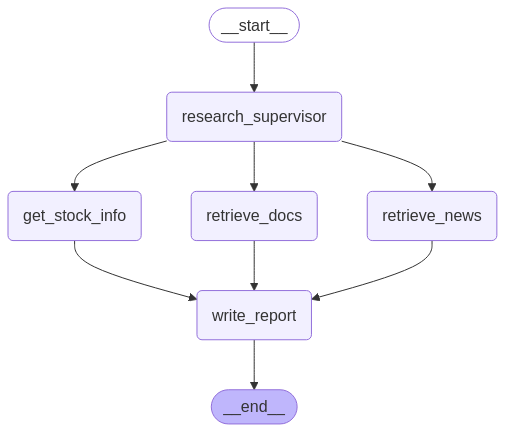

In [4]:
from IPython.display import display, Image

display(Image(app.get_graph().draw_mermaid_png()))

In [5]:
# 초기 상태 설정
initial_state: GraphState = {
    "messages": [],
    "question": "",
    "stocks": [],
    "documents": [],
    "news": [],
    "stock_info": [],
    "answer": "",
    "rejected": "none",
    "model": model,
}

result = app.invoke(initial_state)

In [6]:
print(result["answer"])

# 삼성전자 주가 전망 분석 보고서

## 1. 기본 정보
- **현재 주가:** 55,000원
- **52주 최고가:** 62,000원
- **52주 최저가:** 50,000원

## 2. 주가 평가
최근 분석 리포트에 따르면 삼성전자의 현재 주가는 저평가 상태에 있습니다. 이는 주식 시장에서의 현재 가치가 기업의 내재 가치에 비해 낮다는 것을 의미합니다. 저평가된 주식은 잠재적 투자 기회를 나타내며, 시장이 주가를 조정할 가능성을 내포하고 있습니다.

## 3. 기술 혁신
삼성전자는 현재 다양한 기술 혁신 소식을 발표중이며, 이는 투자자들에게 긍정적인 신호로 해석될 수 있습니다. 기술 혁신은 기업의 경쟁력을 높이고, 장기 수익성에 긍정적인 영향을 미칠 수 있는 요소입니다. 특히 반도체 및 스마트폰 관련 기술의 발전은 삼성전자의 미래 성장 가능성을 높이는 중요한 요인입니다.

## 4. 향후 전망
- 현재 주가는 55,000원으로 52주 최고가(62,000원)에 비해 약 11.3% 낮은 수준입니다. 
- 시장에서 주가가 저평가라는 의견이 있는 만큼, 기술 혁신이 지속된다면 주가 상승 여력은 충분히 존재합니다.
- 단기적으로 52주 최저가(50,000원)과의 근접성으로 인한 리스크도 함께 고려해야 하므로 시장의 변동성을 지켜보는 것이 중요합니다.

## 5. 투자 포인트 요약
1. **저평가된 주가:** 현재 주가는 내재 가치에 비해 낮음.
2. **기술 혁신:** 새로운 기술 개발이 기업 성장에 긍정적 영향.
3. **장기적인 전망:** 상승 여지가 있으며, 지속적인 기술 혁신에 따른 성장 가능성 강조.
4. **리스크 관리 필요:** 시장 변동성에 유의하며 투자 전략을 세워야 함.

결론적으로 삼성전자는 현재 저평가된 상태이며 기술 혁신으로 미래 성장 가능성이 높습니다. 따라서 장기적인 관점에서 긍정적인 전망을 갖고 있지만, 단기적 리스크를 고려한 접근이 필요합니다.
